# 4AV - Métodos Numéricos

Prof. Leonardo M. Cavalcanti - Semestre 2024.1

## Integrantes:

- Gabriela Ribeiro Barbosa Lemos / 848843
- Júlia Silva Souto / 848740
- João Estevam / 849501

In [165]:
try:
#    %pip install numpy
#    %pip install matplotlib

    from numpy import array, poly1d, sort, mean, zeros, linalg, linspace, polyfit, random
    from scipy.interpolate import BarycentricInterpolator
    from sklearn.linear_model import LinearRegression
    from random  import randrange, randint
    from matplotlib import pyplot as plt

    print("\nAmbiente preparado com sucesso!")

except:
    print("\nErro preparando o ambiente.")


Ambiente preparado com sucesso!


## Gerando Pontos

In [166]:
random.seed(0)
data_x = sort(random.rand(100) * 10)
data_y = 2 * data_x + 3 + random.randn(100)

max_point = int(data_x[-1]) + 1

data_xy = array([[data_x[i],data_y[i]] for i in range(100)])

print("Pontos:\n", data_xy)

Pontos:
 [[ 0.04695476  1.92875968]
 [ 0.187898    4.2766225 ]
 [ 0.20107546  3.86781336]
 [ 0.20218397  1.86812426]
 [ 0.39187792  5.27200804]
 [ 0.60225472  6.10039861]
 [ 0.64147496  5.4617295 ]
 [ 0.71036058  4.24079633]
 [ 0.871293    3.67183337]
 [ 0.93940511  5.93326194]
 [ 0.96098408  4.51879121]
 [ 0.97101276  6.16447059]
 [ 1.02044811  5.24917119]
 [ 1.10375141  6.18414186]
 [ 1.18274426  5.72185491]
 [ 1.18727719  6.08112755]
 [ 1.20196561  5.41443124]
 [ 1.28926298  7.36439645]
 [ 1.31797862  5.76286934]
 [ 1.38182951  6.16564839]
 [ 1.43353287  7.75021645]
 [ 1.58969584  4.83163261]
 [ 1.61309518  4.95570536]
 [ 1.83191362  7.63322395]
 [ 1.96582362  5.75852383]
 [ 2.08876756  9.12115631]
 [ 2.10382561  6.79403224]
 [ 2.44425592  7.14105703]
 [ 2.53291603  9.98877408]
 [ 2.64555612  9.77162703]
 [ 2.65389491 10.17534878]
 [ 2.82806963  9.56218391]
 [ 2.89406093  7.92689617]
 [ 2.96140198 10.8328689 ]
 [ 3.15428351  9.04056365]
 [ 3.17983179 10.16211998]
 [ 3.18568952 10.31

## Ajustando os pontos a uma reta (regressão linear)

Seguindo a formula usada em sala:

In [167]:
def calculate_mean_sqr_err(y, prediction):
    return sum((prediction)**2) / len(y)

def calculate_linear_gradient_descent(data_x, data_y):
    iterations = 1000
    learning_rate = 0.0001
    error_rate = 1e-6

    current_weight = 0.1
    current_bias = 0.01
    n = float(len(data_x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        prediction = (current_weight * data_x) + current_bias

        current_cost = calculate_mean_sqr_err(data_y, prediction)

        if previous_cost and abs(previous_cost-current_cost)<=error_rate:
            break

        previous_cost = current_cost

        weight_derivative = -(2/n) * sum(data_x * (data_y-prediction))
        bias_derivative = -(2/n) * sum(data_y-prediction)

        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

    return poly1d([current_weight,current_bias])

linear_gradient_descent = calculate_linear_gradient_descent(data_x, data_y)

print("Polinômio para regressão linear usando gradient descent:\n y =", linear_gradient_descent[0],"* x +", linear_gradient_descent[1])

Polinômio para regressão linear usando gradient descent:
 y = 0.532168464478785 * x + 2.3915612874042513


Utilizando sklearn:

In [168]:
n_data_x = data_x.reshape(-1, 1)
n_data_y = data_y.reshape(-1, 1)

model = LinearRegression().fit(n_data_x, n_data_y)

coeff_linear = model.coef_[0]
constant_term = model.intercept_

print("Polinômio para regressão linear usando sklearn:\n y =", coeff_linear,"* x +", constant_term)

Polinômio para regressão linear usando sklearn:
 y = [1.9328038] * x + [3.51003383]


In [169]:
x_linear = linspace(0, max_point, max_point).reshape(-1, 1)
y_linear = model.predict(x_linear)

## Ajustar os pontos a uma parábola (regressão quadrática)

Usando fórmula usada em sala:

In [170]:
def calculate_mean_sqr_err(y, prediction):
    return sum((prediction - y)**2) / len(y)

def quadractic_gradient_descent(data_x, data_y):
    iterations = 3000
    learning_rate = 0.0001
    error_rate = 1e-6

    current_weight1 = 0.1
    current_weight2 = 0.1
    current_bias = 0.01
    n = float(len(data_x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        prediction = (current_weight1 * data_x**2) + (current_weight2 * data_x) + current_bias

        current_cost = calculate_mean_sqr_err(data_y, prediction)

        if previous_cost and abs(previous_cost - current_cost) <= error_rate:
            break

        previous_cost = current_cost

        weight1_derivative = -(2/n) * sum(data_x**2 * (data_y - prediction))
        weight2_derivative = -(2/n) * sum(data_x * (data_y - prediction))
        bias_derivative = -(2/n) * sum(data_y - prediction)

        current_weight1 = current_weight1 - (learning_rate * weight1_derivative)
        current_weight2 = current_weight2 - (learning_rate * weight2_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

    return (current_weight1 * data_x**2) + (current_weight2 * data_x) + current_bias

gradient_y_quadratic = quadractic_gradient_descent(data_x, data_y)

print("Polinômio para regressão quadrática usando gradient descent:\n y =", gradient_y_quadratic[0],"* x² +", gradient_y_quadratic[1],"* x +",gradient_y_quadratic[2])

Polinômio para regressão quadrática usando gradient descent:
 y = 1.1843586249476523 * x² + 1.4934951712072517 * x + 1.5224163642206596


Utilizando polyfit da biblioteca numpy:

In [171]:
polyfit_square = poly1d(polyfit(data_x, data_y, 2))

print("Polinômio para regressão quadrática usando polyfit_da biblioteca numpy:\n y =", polyfit_square[0],"* x² +", polyfit_square[1],"* x +",polyfit_square[2])

Polinômio para regressão quadrática usando polyfit_da biblioteca numpy:
 y = 3.4321723088517366 * x² + 1.9829878508902887 * x + -0.005198259268332113


## Ajustar os pontos a um polinômio interpolador

Seguindo a formula usada em sala:

In [172]:
def vandermonde_matrix(data_x, data_y):
    num_of_points = data_x.shape[0]

    polynomial_degree = num_of_points - 1

    matrix = zeros([num_of_points, num_of_points])

    for i in range(num_of_points):
        for j in range(num_of_points):
            matrix[j][i] = data_x[j]**(polynomial_degree-i)
    return matrix

def calculate_vandermonde_interpolation(data_x, data_y):
    matrix = vandermonde_matrix(data_x, data_y)
    coeff = linalg.solve(matrix,data_y)
    return poly1d(coeff)

vandermonde_interpolation = calculate_vandermonde_interpolation(data_x, data_y)

print("Polinômio para interpolação usando Vandermonde:")
for i in range(len(vandermonde_interpolation.c)):
    print(vandermonde_interpolation[i], '* x ^', len(vandermonde_interpolation.c)- i - 1, end="")
    if i != len(vandermonde_interpolation.c)-1:
        print(" + ",end="")
    else:
        print()
print("Coeficientes para interpolação usando Vandermonde:\n",vandermonde_interpolation.c)


Polinômio para interpolação usando Vandermonde:
-218133465.58673757 * x ^ 99 + 11102636354.057728 * x ^ 98 + -220740254552.19812 * x ^ 97 + 2378459049850.177 * x ^ 96 + -15547062964132.81 * x ^ 95 + 62236134672972.51 * x ^ 94 + -125125004564938.36 * x ^ 93 + -132489334455695.7 * x ^ 92 + 1929156184021833.8 * x ^ 91 + -7507193198166666.0 * x ^ 90 + 1.837688283578416e+16 * x ^ 89 + -3.1685948828498296e+16 * x ^ 88 + 3.8724426689544e+16 * x ^ 87 + -3.0266985338056564e+16 * x ^ 86 + 6058465501145153.0 * x ^ 85 + 2.19385044946617e+16 * x ^ 84 + -3.813292730856602e+16 * x ^ 83 + 3.578851882500772e+16 * x ^ 82 + -2.0967269451797372e+16 * x ^ 81 + 5506521075037006.0 * x ^ 80 + 2608826606402671.5 * x ^ 79 + -3074509972501777.5 * x ^ 78 + 277850701709678.28 * x ^ 77 + 1770777433403095.0 * x ^ 76 + -1933583885781082.0 * x ^ 75 + 1109244801593933.5 * x ^ 74 + -357949330301727.44 * x ^ 73 + 25332612440824.06 * x ^ 72 + 34686653050355.72 * x ^ 71 + -17451203608333.809 * x ^ 70 + 3612438791129.3257 *

Usando BarycentricInterpolator da biblioteca Scipy:

In [173]:
scipy_interpolation = BarycentricInterpolator(data_x, data_y)

## Plotando os resultados

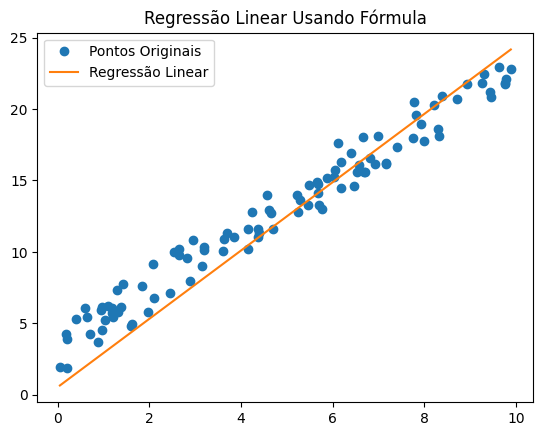

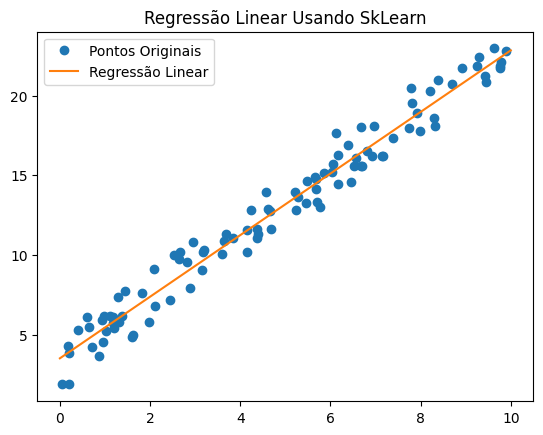

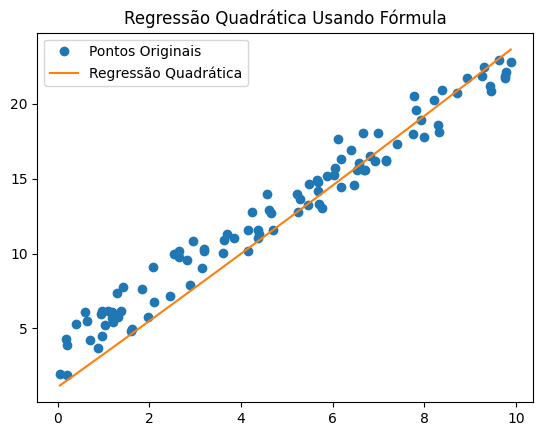

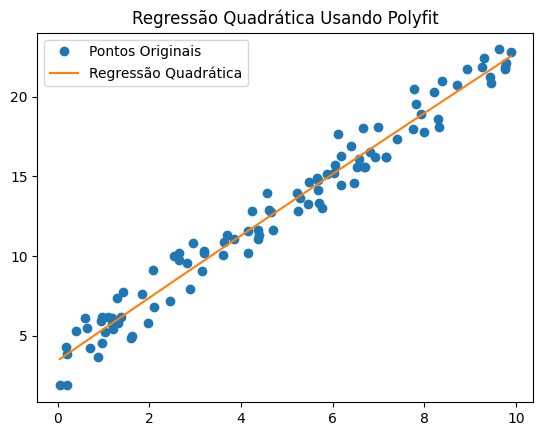

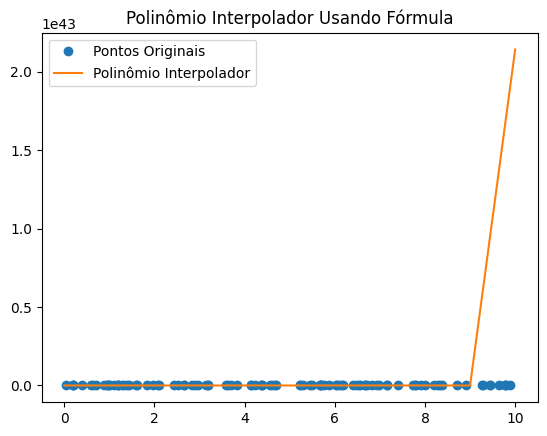

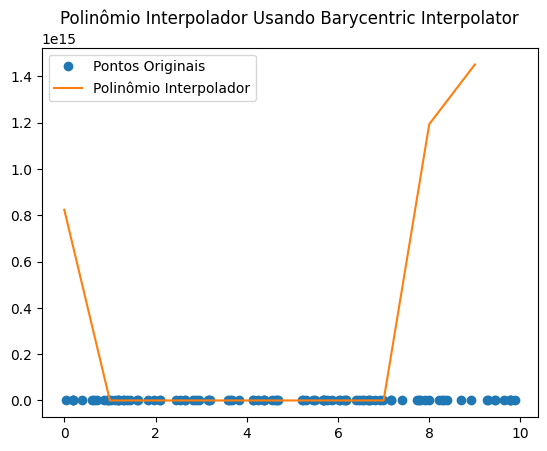

In [174]:
plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(data_x,linear_gradient_descent(data_x), label = "Regressão Linear")
plt.title("Regressão Linear Usando Fórmula")
plt.legend()
plt.show()

plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(x_linear,y_linear, label = "Regressão Linear")
plt.title("Regressão Linear Usando SkLearn")
plt.legend()
plt.show()

plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(data_x,gradient_y_quadratic, label = "Regressão Quadrática")
plt.title("Regressão Quadrática Usando Fórmula")
plt.legend()
plt.show()

plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(data_x,polyfit_square(data_x), label = "Regressão Quadrática")
plt.title("Regressão Quadrática Usando Polyfit")
plt.legend()
plt.show()

plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(range(max_point + 1),vandermonde_interpolation(range(max_point + 1)), label = "Polinômio Interpolador")
plt.title("Polinômio Interpolador Usando Fórmula")
plt.legend()
plt.show()

plt.plot(data_x,data_y, "o", label = "Pontos Originais")
plt.plot(range(max_point),scipy_interpolation(range(max_point)), label = "Polinômio Interpolador")
plt.title("Polinômio Interpolador Usando Barycentric Interpolator")
plt.legend()
plt.show()